### **PREDICTIVE MODELING OF DIARRHEAL DISEASE BASED ON DRINKING WATER QUALITY PARAMETERS**

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
water_data = pd.read_csv('Water_Quality_Analysis.csv')
water_data

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,1
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,1
3,3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,13485,8.295523,3.940000e-09,8.655295,91.541804,1.351378e-03,0.182157,Near Colorless,0.204289,0.113311,...,2.745167,1.248190e-03,411.483691,Aquifer,15.486861,67.414595,April,22.0,9.0,0
13486,13486,7.161280,1.650000e-07,3.408242,203.256967,7.160000e-60,0.224360,Faint Yellow,0.430254,0.201591,...,2.553949,2.403928e-03,488.537426,Spring,15.633130,67.383781,May,22.0,16.0,1
13487,13487,8.435621,2.763102e-02,3.911660,94.823359,6.590000e-31,0.510364,Colorless,0.061130,1.599388,...,3.141153,4.410000e-15,278.793867,Aquifer,30.974614,76.152382,December,18.0,16.0,1
13488,13488,7.111199,1.440000e-05,4.780785,121.394190,1.150000e-07,0.236547,Near Colorless,0.024841,0.923704,...,3.803457,2.270000e-06,417.990028,Lake,36.517741,90.588109,October,30.0,17.0,1


In [ ]:
water_data.head() #displays the first 5 data's

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,1
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,1
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [ ]:
water_data.tail() #displays the last 5 data's

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
13485,13485,8.295523,3.940000e-09,8.655295,91.541804,1.351378e-03,0.182157,Near Colorless,0.204289,0.113311,...,2.745167,1.248190e-03,411.483691,Aquifer,15.486861,67.414595,April,22.0,9.0,0
13486,13486,7.161280,1.650000e-07,3.408242,203.256967,7.160000e-60,0.224360,Faint Yellow,0.430254,0.201591,...,2.553949,2.403928e-03,488.537426,Spring,15.633130,67.383781,May,22.0,16.0,1
13487,13487,8.435621,2.763102e-02,3.911660,94.823359,6.590000e-31,0.510364,Colorless,0.061130,1.599388,...,3.141153,4.410000e-15,278.793867,Aquifer,30.974614,76.152382,December,18.0,16.0,1
13488,13488,7.111199,1.440000e-05,4.780785,121.394190,1.150000e-07,0.236547,Near Colorless,0.024841,0.923704,...,3.803457,2.270000e-06,417.990028,Lake,36.517741,90.588109,October,30.0,17.0,1
13489,13489,6.675299,2.685808e-01,4.176910,206.850959,2.080000e-32,0.191125,Near Colorless,0.182383,0.156001,...,2.543702,7.810000e-05,421.942688,Aquifer,26.916662,55.100000,NaN,NaN,NaN,1


In [ ]:
water_data.shape #the rows and columns

(13490, 24)

In [ ]:
water_data.info() #features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490 entries, 0 to 13489
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   13490 non-null  int64  
 1   pH                      13227 non-null  float64
 2   Iron                    13391 non-null  float64
 3   Nitrate                 13247 non-null  float64
 4   Chloride                13114 non-null  float64
 5   Lead                    13419 non-null  float64
 6   Zinc                    13150 non-null  float64
 7   Color                   13472 non-null  object 
 8   Turbidity               13370 non-null  float64
 9   Fluoride                13023 non-null  float64
 10  Copper                  13056 non-null  float64
 11  Odor                    13084 non-null  float64
 12  Sulfate                 13075 non-null  float64
 13  Conductivity            13114 non-null  float64
 14  Chlorine                13355 non-null

In [ ]:
water_data.describe() #mean, standard deviation, min

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,13490.000000,13227.000000,1.339100e+04,13247.000000,13114.000000,1.341900e+04,13150.000000,1.337000e+04,13023.000000,1.305600e+04,...,13075.000000,13114.000000,13355.000000,1.324500e+04,13485.000000,13105.000000,13423.000000,13271.000000,13265.000000,13490.000000
mean,6744.500000,7.463932,7.030559e-02,5.788980,173.436597,3.894249e-04,1.457742,3.739627e-01,0.861583,4.277804e-01,...,139.171378,425.138094,3.174017,4.341843e-02,256.772155,19.069927,60.056511,15.701982,11.447870,0.502595
std,3894.371901,0.696417,3.178854e-01,2.655479,54.473915,1.479799e-02,1.367315,6.272807e-01,0.662777,4.456322e-01,...,59.066930,188.919161,0.649792,2.932331e-01,148.957739,11.101887,17.909892,8.820740,6.938045,0.500012
min,0.000000,3.123675,4.020000e-36,0.729568,38.977696,0.000000e+00,0.000028,2.310000e-11,0.000319,4.440000e-08,...,16.164578,31.431001,1.224162,2.820000e-36,0.034175,1.558907,-3.562259,1.000000,0.000000,0.000000
25%,3372.250000,6.973405,6.545000e-06,3.904171,134.929831,4.350000e-123,0.412515,3.318857e-02,0.364160,1.204257e-01,...,96.482786,288.838517,2.710814,1.120000e-06,128.553513,11.326866,48.010701,8.000000,5.000000,0.000000
50%,6744.500000,7.461944,1.520293e-03,5.449208,170.442429,3.830000e-64,1.048384,1.754248e-01,0.727933,3.240113e-01,...,131.960878,397.603169,3.161399,2.850770e-04,255.934922,16.508648,60.037640,16.000000,11.000000,1.000000
75%,10116.750000,7.958861,3.549807e-02,7.346497,207.895949,1.125000e-27,2.162775,5.137567e-01,1.233850,6.173356e-01,...,175.655143,532.432229,3.617632,7.743089e-03,383.938903,23.754799,72.339608,23.000000,18.000000,1.000000
max,13489.000000,11.176598,9.032577e+00,37.853915,732.387659,1.532888e+00,17.468694,1.283193e+01,7.803605,1.000881e+01,...,1279.553774,1662.490270,9.491165,1.184261e+01,579.579250,115.056432,126.757062,31.000000,23.000000,1.000000


In [ ]:
water_data.isnull().sum() # missing values

,0
Index,0
pH,263
Iron,99
Nitrate,243
Chloride,376
Lead,71
Zinc,340
Color,18
Turbidity,120
Fluoride,467


In [ ]:
water_data = water_data.dropna() #removing the null values

In [ ]:
water_data.isnull().sum() # after removal of null values

,0
Index,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,0
Turbidity,0
Fluoride,0


## **DATA VISUALIZATION**

<Axes: xlabel='Index', ylabel='Fluoride'>

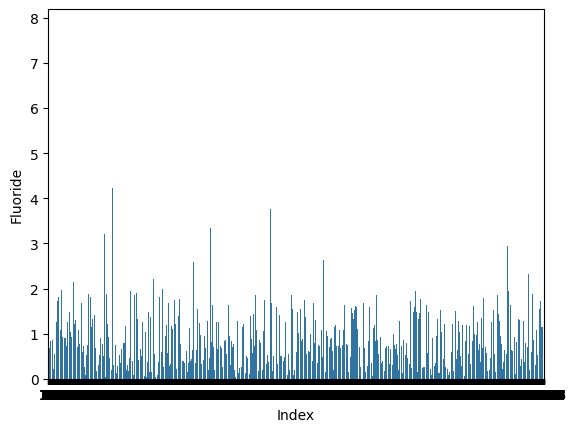

In [ ]:
sns.barplot(x='Index', y='Fluoride', data=water_data)

<Axes: xlabel='Total Dissolved Solids', ylabel='Turbidity'>

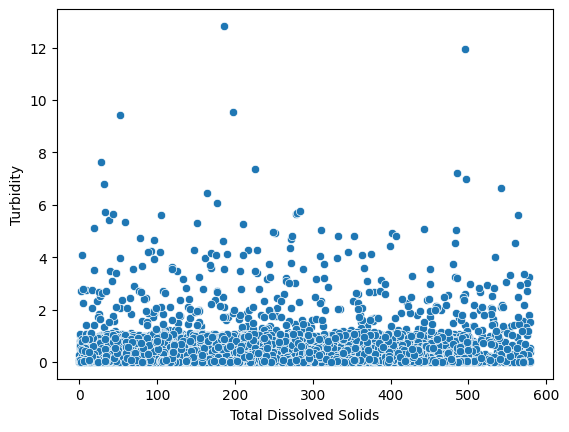

In [ ]:
sns.scatterplot(x='Total Dissolved Solids', y='Turbidity', data=water_data)

Text(0.5, 1.0, 'Fluoride Concentration Distribution')

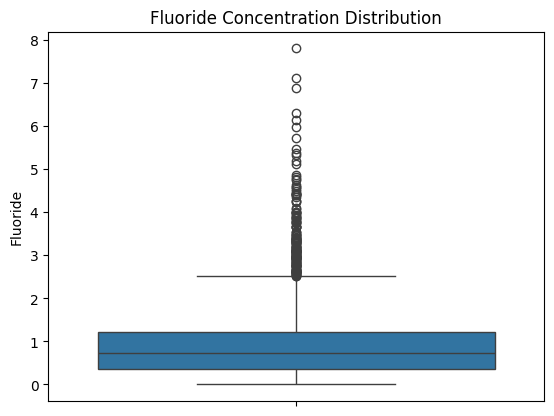

In [ ]:
sns.boxplot(y='Fluoride', data=water_data)
plt.title("Fluoride Concentration Distribution")

Text(0.5, 1.0, 'pH vs Turbidity')

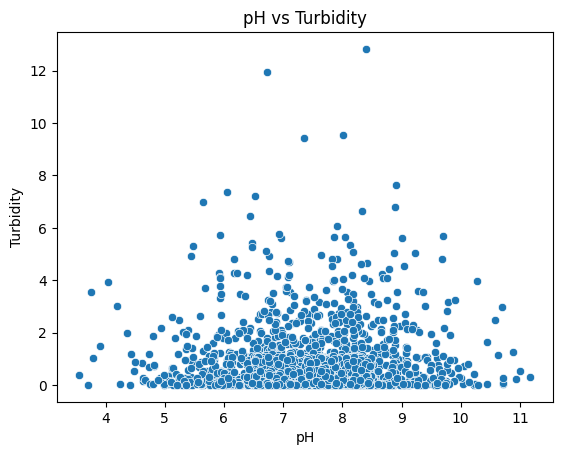

In [ ]:
sns.scatterplot(x='pH', y='Turbidity', data=water_data)
plt.title("pH vs Turbidity")

Text(0.5, 1.0, 'TDS Levels per Sample')

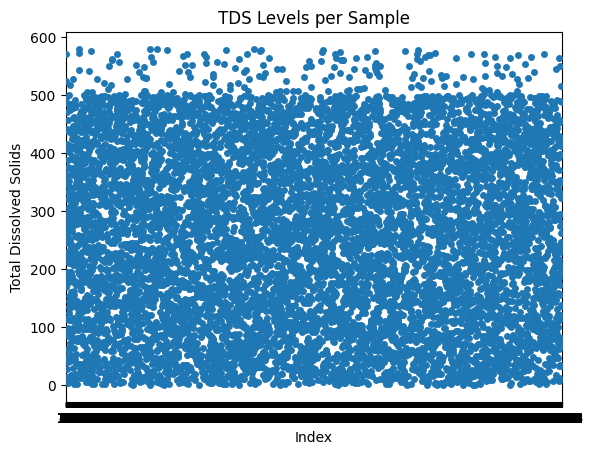

In [ ]:
sns.swarmplot(x='Index', y='Total Dissolved Solids', data=water_data)
plt.title("TDS Levels per Sample")

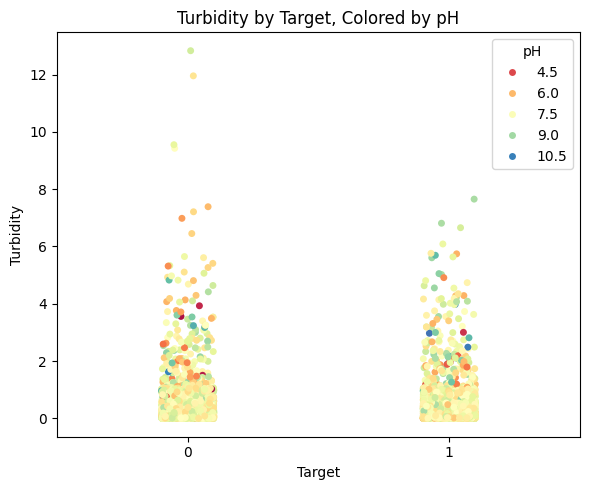

In [ ]:
plt.figure(figsize=(6, 5))
sns.stripplot(data=water_data, x='Target', y='Turbidity', hue='pH', jitter=True, palette='Spectral')
plt.title("Turbidity by Target, Colored by pH")
plt.tight_layout()
plt.show()


## **Analyzing the Water Quality Parameters**

# **Chemical Parameters - Nitrate (NO₃⁻), Chlorine residual, Fluoride,  Turbidity, Total Dissolved Solids (TDS)**

<Axes: xlabel='Nitrate', ylabel='Density'>

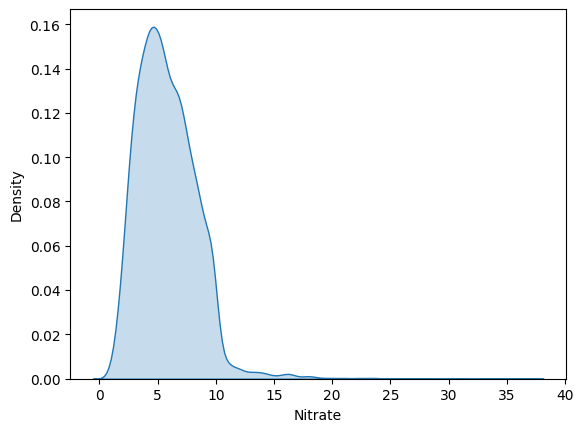

In [ ]:
sns.kdeplot(water_data["Nitrate"], shade = True)

In [ ]:
# Function to classify nitrate safety
def nitrate_status(value):
    if value <= 50:
        return 'Safe'
    else:
        return 'Unsafe'

In [ ]:
# Add status column
water_data['Nitrate Status'] = water_data['Nitrate'].apply(nitrate_status)

In [ ]:
water_data[['Index', 'Nitrate', 'Nitrate Status']].head()

,Index,Nitrate,Nitrate Status
1,1,3.734167,Safe
2,2,3.816994,Safe
4,4,9.925788,Safe
7,7,9.261676,Safe
9,9,3.620641,Safe


In [ ]:
# Count of status types
print("\n📊 Nitrate Status Counts:")
print(water_data['Nitrate Status'].value_counts())


📊 Nitrate Status Counts:
Nitrate Status
Safe    9046
Name: count, dtype: int64


<Axes: xlabel='Nitrate Status', ylabel='count'>

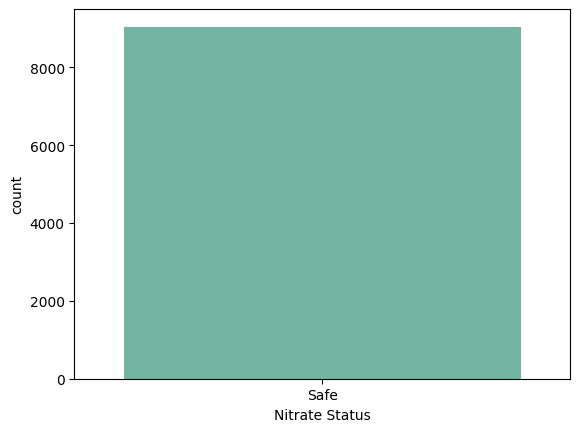

In [ ]:
sns.countplot(x = 'Nitrate Status', data = water_data, palette = 'Set2')

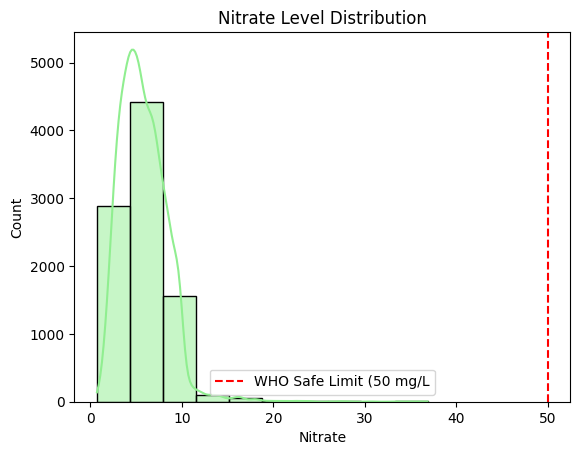

In [ ]:
sns.histplot(water_data['Nitrate'], bins=10, kde=True, color='lightgreen')
plt.axvline(50, color='red', linestyle='--', label='WHO Safe Limit (50 mg/L')
plt.title("Nitrate Level Distribution")
plt.legend()
plt.show()

**Chlorine**

<Axes: xlabel='Chlorine', ylabel='Density'>

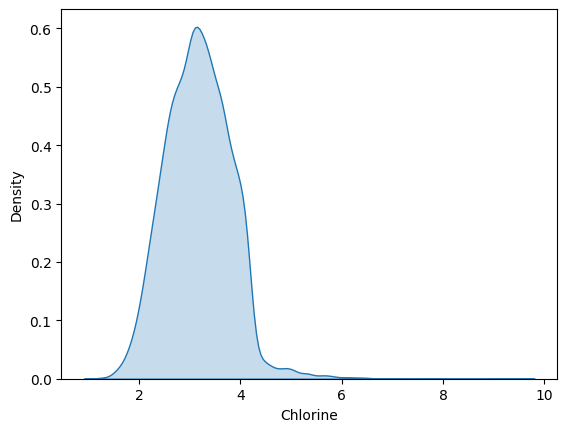

In [ ]:
sns.kdeplot(water_data["Chlorine"], shade = True)

In [ ]:
# Function to classify chlorine status
def chlorine_status(value):
    if value < 0.2:
        return 'Low'
    elif 0.2 <= value <= 1.0:
        return 'Safe'
    elif 1.0 < value <= 5.0:
        return 'High'
    else:
        return 'Unsafe'

<Axes: xlabel='Color', ylabel='count'>

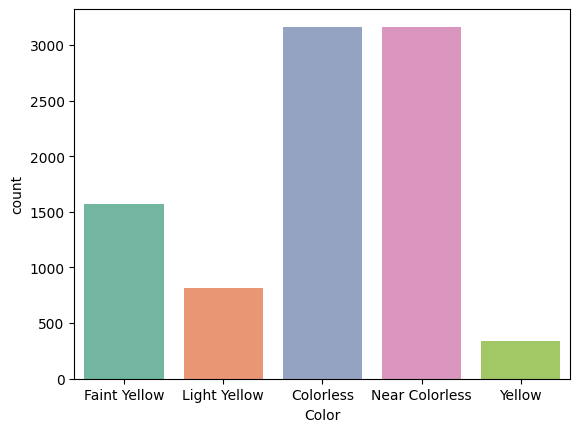

In [ ]:
sns.countplot(x = 'Color', data = water_data, palette = 'Set2')

In [ ]:
# Add status column
water_data['Chlorine Status'] = water_data['Chlorine'].apply(chlorine_status)

In [ ]:
# Count and display chlorine status
print("Chlorine Status Counts:")
print(water_data['Chlorine Status'].value_counts())

Chlorine Status Counts:
Chlorine Status
High      8964
Unsafe      82
Name: count, dtype: int64


<Axes: xlabel='Chlorine Status', ylabel='count'>

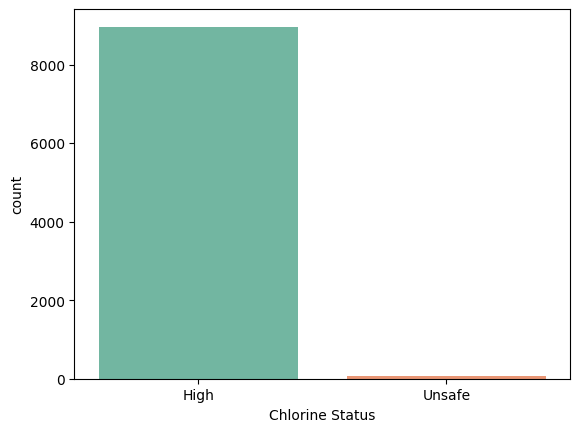

In [ ]:
sns.countplot(x = 'Chlorine Status', data = water_data, palette = 'Set2')

In [ ]:
print("Number of unsafe chlorine samples:", (water_data['Chlorine'] >= 5).sum())

Number of unsafe chlorine samples: 82


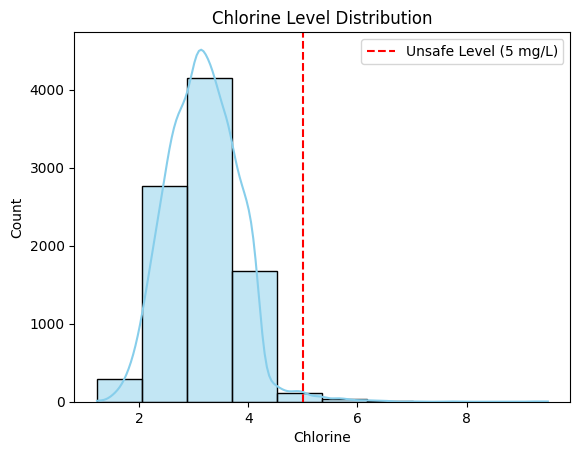

In [ ]:
sns.histplot(water_data['Chlorine'], bins=10, kde=True, color='skyblue')
plt.axvline(5, color='red', linestyle='--', label='Unsafe Level (5 mg/L)')
plt.title("Chlorine Level Distribution")
plt.legend()
plt.show()

**Fluoride**

<Axes: xlabel='Fluoride', ylabel='Density'>

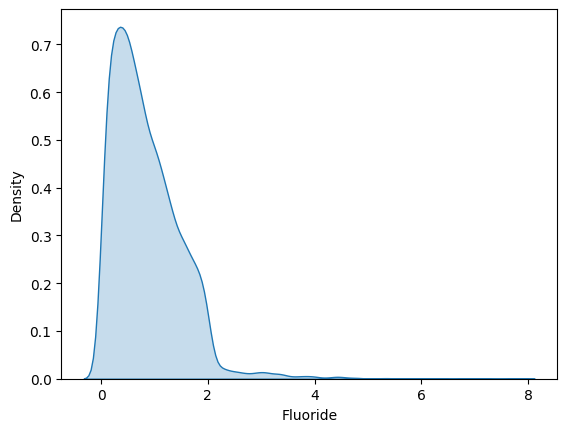

In [ ]:
sns.kdeplot(water_data["Fluoride"], shade = True)

In [ ]:
# Classify fluoride safety levels
water_data['Fluoride Status'] = water_data['Fluoride'].apply(
    lambda x: 'Safe' if x <= 1.0 else
              'Caution' if x <= 1.5 else
              'Unsafe'
)

In [ ]:
water_data[['Index', 'Fluoride', 'Fluoride Status']].head()

,Index,Fluoride,Fluoride Status
1,1,0.622874,Safe
2,2,0.423423,Safe
4,4,0.222912,Safe
7,7,1.016196,Caution
9,9,0.842107,Safe


In [ ]:
# Count of status types
print("\n📊 Fluoride Status Counts:")
print(water_data['Fluoride Status'].value_counts())


📊 Fluoride Status Counts:
Fluoride Status
Safe       5887
Caution    1748
Unsafe     1411
Name: count, dtype: int64


<Axes: xlabel='Fluoride Status', ylabel='count'>

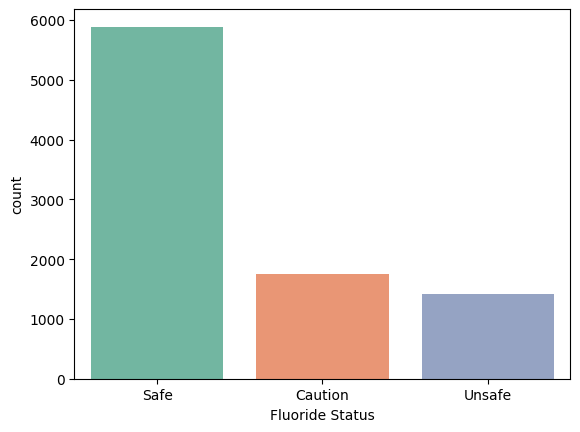

In [ ]:
sns.countplot(x = 'Fluoride Status', data = water_data, palette = 'Set2')

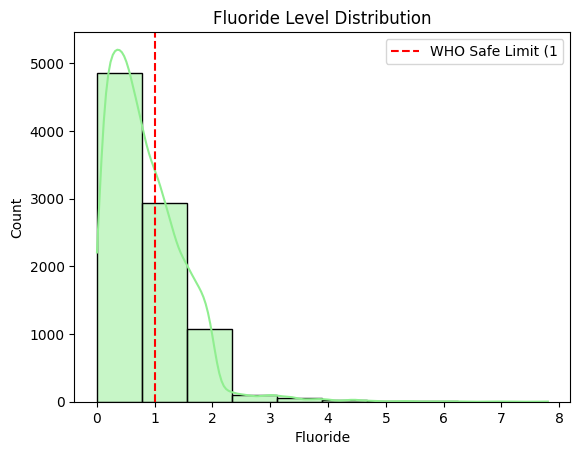

In [ ]:
sns.histplot(water_data['Fluoride'], bins=10, kde=True, color='lightgreen')
plt.axvline(1, color='red', linestyle='--', label='WHO Safe Limit (1')
plt.title("Fluoride Level Distribution")
plt.legend()
plt.show()

**Turbidity**

<Axes: xlabel='Turbidity', ylabel='Density'>

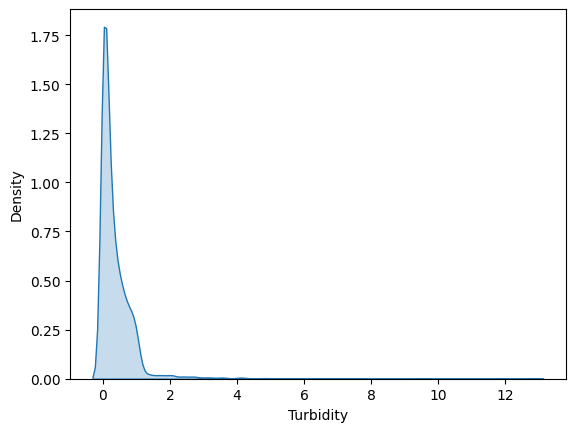

In [ ]:
sns.kdeplot(water_data["Turbidity"], shade = True)

In [ ]:
# Function to classify turbidity levels
def turbidity_status(ntu):
    if ntu < 1:
        return 'Excellent', 'Recommended for effective disinfection'
    elif 1 <= ntu <= 5:
        return 'Acceptable', 'Safe appearance, but may reduce disinfection'
    else:
        return 'Unacceptable', 'Poor appearance, disinfection may be ineffective'

In [ ]:
# Apply classification
water_data[['Turbidity Status', 'Remarks']] = water_data['Turbidity'].apply(lambda x: pd.Series(turbidity_status(x)))

In [ ]:
# Count of status types
print("\n📊 Turbidity Status Counts:")
print(water_data['Turbidity Status'].value_counts())


📊 Turbidity Status Counts:
Turbidity Status
Excellent       8469
Acceptable       550
Unacceptable      27
Name: count, dtype: int64


<Axes: xlabel='Turbidity Status', ylabel='count'>

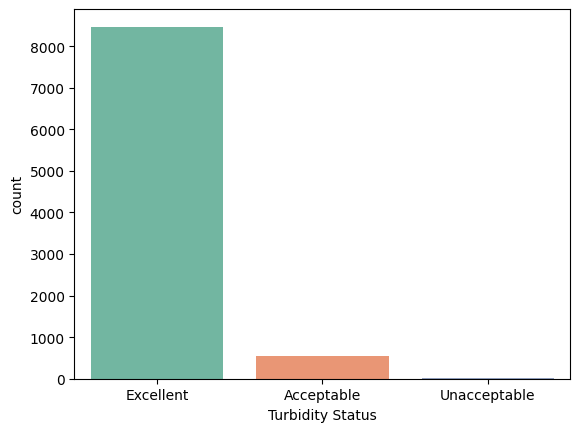

In [ ]:
sns.countplot(x = 'Turbidity Status', data = water_data, palette = 'Set2')

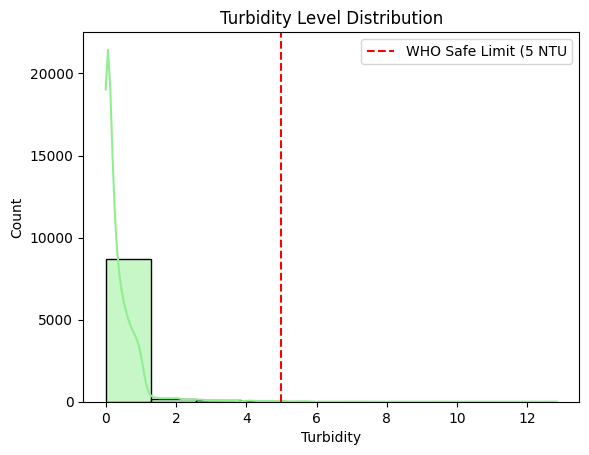

In [ ]:
sns.histplot(water_data['Turbidity'], bins=10, kde=True, color='lightgreen')
plt.axvline(5, color='red', linestyle='--', label='WHO Safe Limit (5 NTU')
plt.title("Turbidity Level Distribution")
plt.legend()
plt.show()

**Total Dissolved Solids**

In [ ]:
water_data[['Turbidity', 'Turbidity Status', 'Remarks']].head()

,Turbidity,Turbidity Status,Remarks
1,0.019007,Excellent,Recommended for effective disinfection
2,0.319956,Excellent,Recommended for effective disinfection
4,0.004867,Excellent,Recommended for effective disinfection
7,0.047803,Excellent,Recommended for effective disinfection
9,0.050613,Excellent,Recommended for effective disinfection


<Axes: xlabel='Total Dissolved Solids', ylabel='Density'>

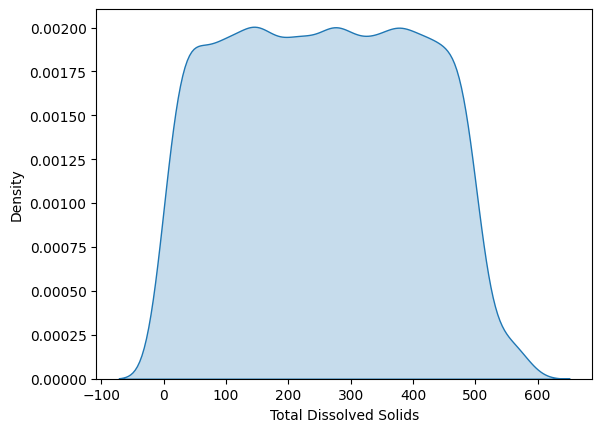

In [ ]:
sns.kdeplot(water_data["Total Dissolved Solids"], shade = True)

In [ ]:
# Function to classify water quality based on TDS
def tds_quality(tds):
    if tds <= 300:
        return 'Excellent', 'Ideal for drinking'
    elif 300 < tds <= 600:
        return 'Good', 'Acceptable taste'
    elif 600 < tds <= 900:
        return 'Fair', 'Slightly salty or mineral taste'
    elif 900 < tds <= 1200:
        return 'Poor', 'Unpleasant taste'
    else:
        return 'Unacceptable', 'Not recommended for drinking'


In [ ]:
# Apply classification
water_data[['Water Quality', 'Remarks']] = water_data['Total Dissolved Solids'].apply(lambda x: pd.Series(tds_quality(x)))

In [ ]:
# Display the classified data
water_data[['Total Dissolved Solids', 'Water Quality', 'Remarks']].head()

,Total Dissolved Solids,Water Quality,Remarks
1,284.641984,Excellent,Ideal for drinking
2,570.054094,Good,Acceptable taste
4,168.075545,Excellent,Ideal for drinking
7,214.553104,Excellent,Ideal for drinking
9,113.909077,Excellent,Ideal for drinking


In [ ]:
# Count of status types
print("\n📊 Total Dissolved Solids Status Counts:")
print(water_data['Water Quality'].value_counts())


📊 Total Dissolved Solids Status Counts:
Water Quality
Excellent    5327
Good         3719
Name: count, dtype: int64


<Axes: xlabel='Water Quality', ylabel='count'>

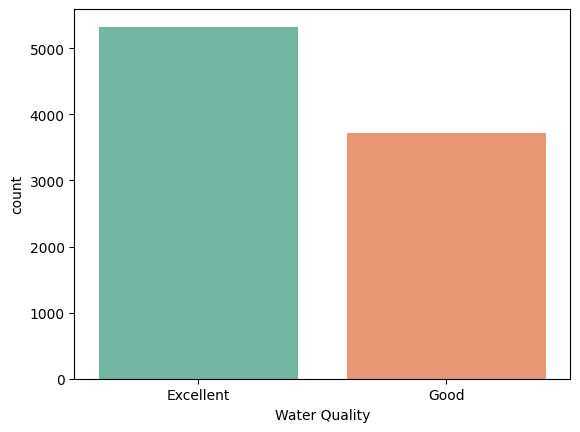

In [ ]:
sns.countplot(x = 'Water Quality', data = water_data, palette = 'Set2')

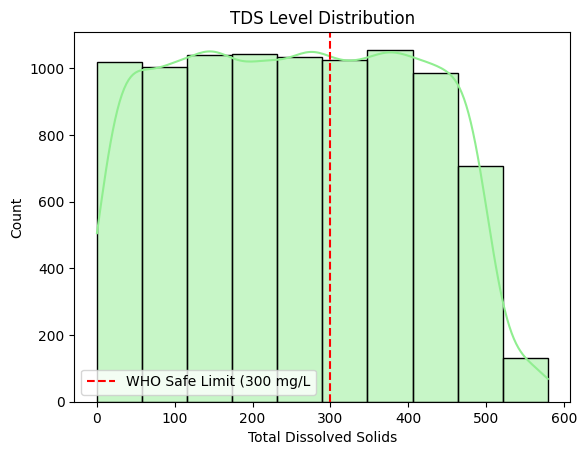

In [ ]:
sns.histplot(water_data['Total Dissolved Solids'], bins=10, kde=True, color='lightgreen')
plt.axvline(300, color='red', linestyle='--', label='WHO Safe Limit (300 mg/L')
plt.title("TDS Level Distribution")
plt.legend()
plt.show()

## **Physical Parameters - pH, Temperature, Color & Odor**

**pH**

<Axes: xlabel='pH', ylabel='Density'>

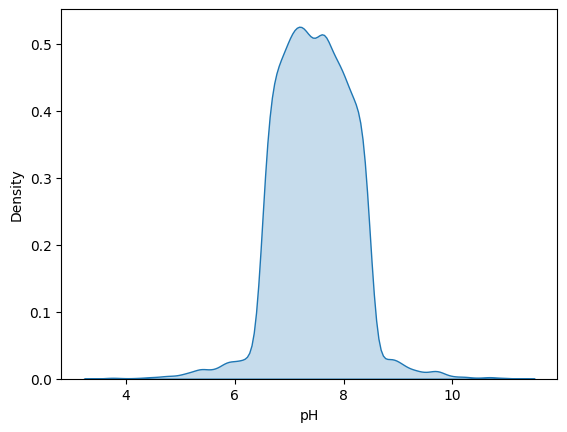

In [ ]:
sns.kdeplot(water_data["pH"], shade = True)

In [ ]:
# Function to classify pH status
def pH_status(value):
    if 0.0 < value < 0.69:
        return 'Acidic'
    elif 7.1 <= value <= 14.0:
        return 'Basic'
    else:
        return 'Pure Water'

In [ ]:
# Add status column
water_data['pH Status'] = water_data['pH'].apply(pH_status)

In [ ]:
# Count and display pH status
print("pH Counts:")
print(water_data['pH Status'].value_counts())

pH Counts:
pH Status
Basic         6197
Pure Water    2849
Name: count, dtype: int64


<Axes: xlabel='pH Status', ylabel='count'>

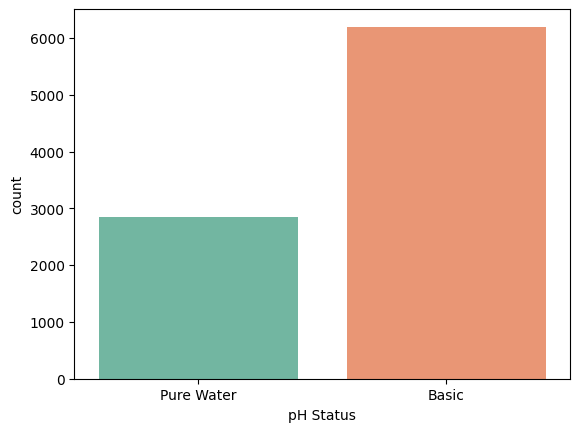

In [ ]:
sns.countplot(x = 'pH Status', data = water_data, palette = 'Set2')

In [ ]:
print("Number of pure water samples:", (water_data['pH'] == 7).sum())

Number of pure water samples: 0


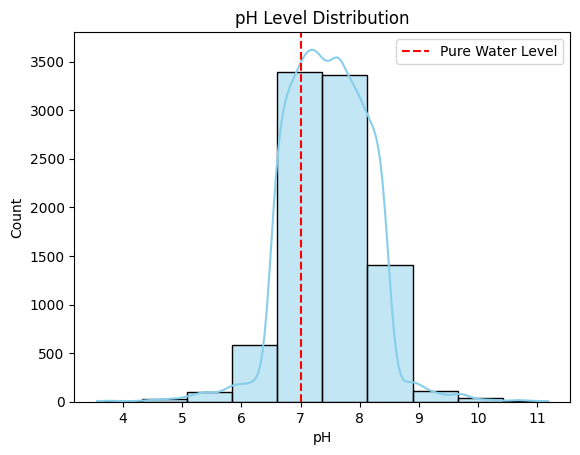

In [ ]:
sns.histplot(water_data['pH'], bins=10, kde=True, color='skyblue')
plt.axvline(7, color='red', linestyle='--', label='Pure Water Level')
plt.title("pH Level Distribution")
plt.legend()
plt.show()

**Water Temperature**

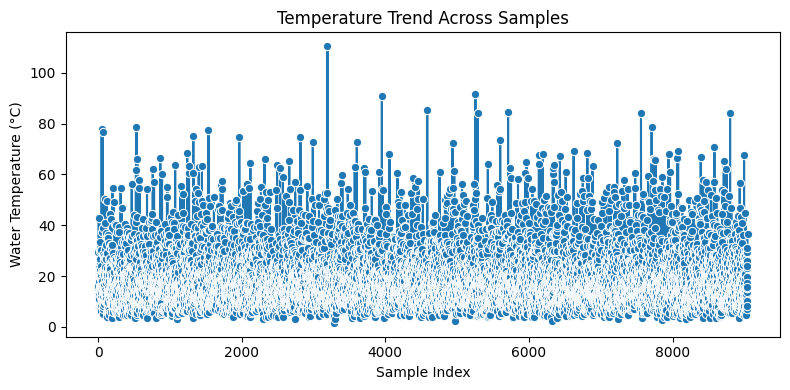

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(water_data)), y='Water Temperature', data=water_data, marker='o')
plt.title("Temperature Trend Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Water Temperature (°C)")
plt.tight_layout()
plt.show()

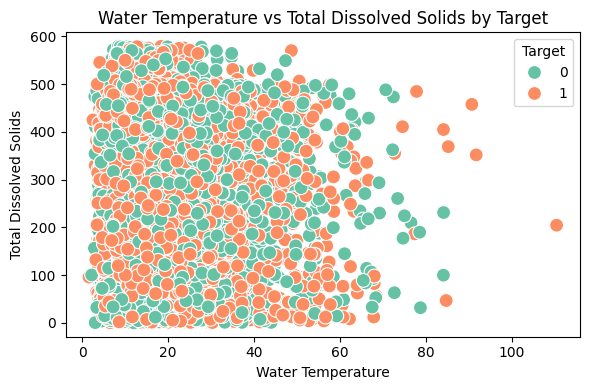

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=water_data, x='Water Temperature', y='Total Dissolved Solids', hue='Target', palette='Set2', s=100)
plt.title("Water Temperature vs Total Dissolved Solids by Target")
plt.tight_layout()
plt.show()

**Air Temperature**

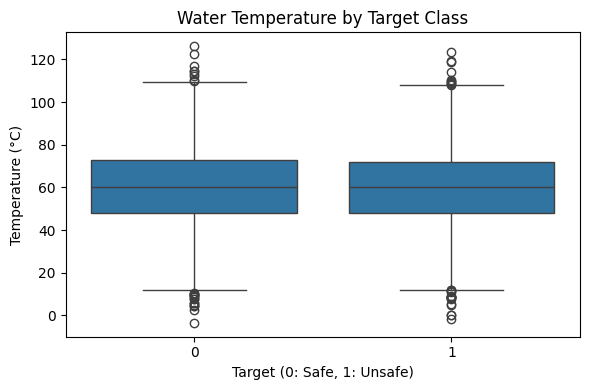

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Target', y='Air Temperature', data=water_data)
plt.title("Water Temperature by Target Class")
plt.xlabel("Target (0: Safe, 1: Unsafe)")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

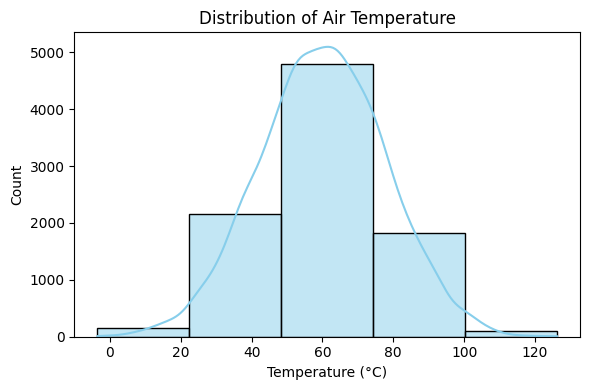

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(water_data['Air Temperature'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Air Temperature")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()

**Color**

<Axes: xlabel='Color', ylabel='count'>

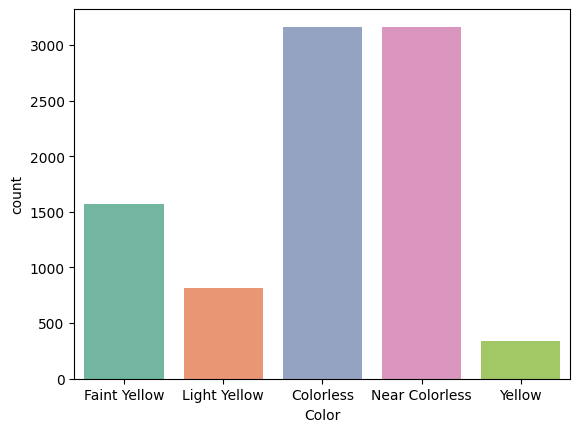

In [ ]:
sns.countplot(x = 'Color', data = water_data, palette = 'Set2')

**Odor**

In [ ]:
sns.countplot(x = 'Odor', data = water_data, palette = 'Set2')

# **Environmental / Supporting Parameters**

**Source**

In [ ]:
sns.countplot(x = 'Source', data = water_data, palette = 'Set2')

**Dropping the Columns**

In [ ]:
water_data.drop(columns=['Iron', 'Chloride', 'Lead', 'Zinc', 'Color', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Manganese', 'Source'], inplace=True)

In [ ]:
cols_to_drop = ['Month', 'Severity', 'Remarks', 'Formatted Time']
water_data = water_data.drop(columns=[col for col in cols_to_drop if col in water_data.columns])

In [ ]:
cols_to_drop = ['Month', 'Chlorine Status', 'pH Status', 'Nitrate Status', 'Water Quality', 'Fluoride Status', 'Remarks', 'Turbidity Status', 'Severity']
water_data = water_data.drop(columns=[col for col in cols_to_drop if col in water_data.columns])

**Correlation**

In [ ]:
correlation = water_data.corr()

<Axes: >

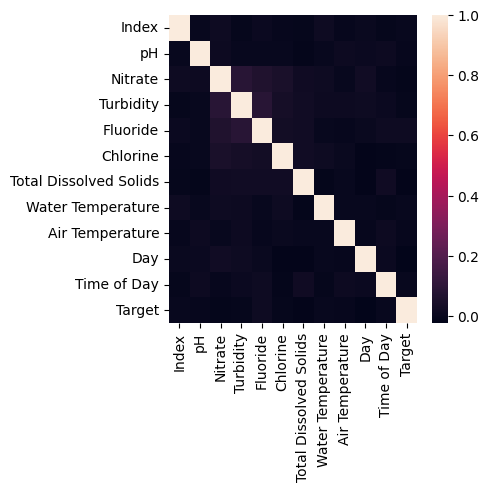

In [ ]:
plot = plt.figure(figsize = (4, 4))
sns.heatmap(water_data.corr())

### **MODEL BUILDING AND EVALUATION**

In [ ]:
X = water_data.drop(columns = 'Target', axis = 1)
Y = water_data['Target']

In [ ]:
print(X)
print()

       Index        pH   Nitrate  Turbidity  Fluoride  Chlorine  \
1          1  6.917863  3.734167   0.019007  0.622874  3.292038   
2          2  5.443762  3.816994   0.319956  0.423423  3.560224   
4          4  8.091909  9.925788   0.004867  0.222912  3.177849   
7          7  7.258203  9.261676   0.047803  1.016196  2.325094   
9          9  7.100650  3.620641   0.050613  0.842107  2.284971   
...      ...       ...       ...        ...       ...       ...   
13484  13484  6.764489  4.256607   0.382500  1.372649  2.370997   
13485  13485  8.295523  8.655295   0.204289  0.113311  2.745167   
13486  13486  7.161280  3.408242   0.430254  0.201591  2.553949   
13487  13487  8.435621  3.911660   0.061130  1.599388  3.141153   
13488  13488  7.111199  4.780785   0.024841  0.923704  3.803457   

       Total Dissolved Solids  Water Temperature  Air Temperature   Day  \
1                  284.641984          15.348981        71.220586  26.0   
2                  570.054094          11.643

In [ ]:
print(Y)

1        1
2        1
4        0
7        0
9        0
        ..
13484    0
13485    0
13486    1
13487    1
13488    1
Name: Target, Length: 9046, dtype: int64


**Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(9046, 11) (8141, 11) (905, 11)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

**Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
# training the logistic regression model by using training data
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

In [ ]:
print(water_data['Target'].value_counts())

Target
1    4526
0    4520
Name: count, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('Accuracy of logistic regression classifier on training set: {:2f}'
            .format(logreg.score(X_train, Y_train)))

Accuracy of logistic regression classifier on training set: 0.514004


In [ ]:
print('Accuracy of logistic regression classifier on testing set: {:2f}'
            .format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on testing set: 0.495137


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree Classifier on training set: {:2f}'
            .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree Classifier on testing set: {:2f}'
            .format(clf.score(X_test, Y_test)))

Accuracy of Decision Tree Classifier on training set: 1.000000
Accuracy of Decision Tree Classifier on testing set: 0.516357


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB Classifier on training set: {:2f}'
            .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB Classifier on testing set: {:2f}'
            .format(gnb.score(X_test, Y_test)))

Accuracy of GNB Classifier on training set: 0.515183
Accuracy of GNB Classifier on testing set: 0.495579


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy on testing data:', testing_data_accuracy)

accuracy on testing data: 0.5106100795755968


**SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM Classifier on training set: {:2f}'
            .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM Classifier on testing set: {:2f}'
            .format(svm.score(X_test, Y_test)))